In [51]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
import yfinance as yf

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.linear_model import Perceptron


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Series de tiempo

In [2]:
def split_sequence(sequence, n_steps_in, n_steps_out):
 X, y = list(), list()
 for i in range(len(sequence)):

  end_ix = i + n_steps_in
  out_end_ix = end_ix + n_steps_out

  if out_end_ix > len(sequence):
    break

  seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
  X.append(seq_x)
  y.append(seq_y)
 return array(X), array(y)
 

raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

n_steps_in, n_steps_out = 3, 2

X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps_in))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

model.fit(X, y, epochs=2000, verbose=0)

x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[105.18027 115.2076 ]]


In [3]:
data = yf.Ticker("NVDA").history(period='5y')

print(data.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-05-16 00:00:00-04:00 to 2023-05-15 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1258 non-null   float64
 1   High          1258 non-null   float64
 2   Low           1258 non-null   float64
 3   Close         1258 non-null   float64
 4   Volume        1258 non-null   int64  
 5   Dividends     1258 non-null   float64
 6   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB
None


In [34]:
X, y = split_sequence(data['Close'].iloc[:-65], 60, 5)

In [72]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=60))
model.add(Dense(50, activation='relu'))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mse')

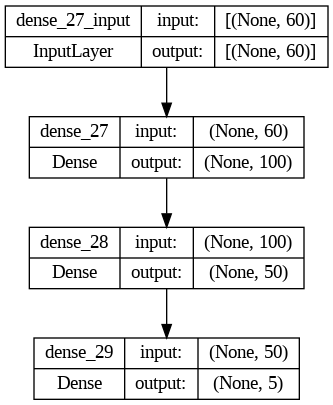

In [73]:
plot_model(model,  show_shapes=True, show_layer_names=True)

In [74]:
history = model.fit(X, y, epochs=200)

Epoch 1/200
36/36 [==============================] - 1s 3ms/step - loss: 3786.1382
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 347.6888
Epoch 3/200
36/36 [==============================] - 0s 3ms/step - loss: 276.1425
Epoch 4/200
36/36 [==============================] - 0s 3ms/step - loss: 228.2165
Epoch 5/200
36/36 [==============================] - 0s 3ms/step - loss: 199.6440
Epoch 6/200
36/36 [==============================] - 0s 3ms/step - loss: 171.4441
Epoch 7/200
36/36 [==============================] - 0s 3ms/step - loss: 159.8538
Epoch 8/200
36/36 [==============================] - 0s 3ms/step - loss: 149.2612
Epoch 9/200
36/36 [==============================] - 0s 3ms/step - loss: 146.6317
Epoch 10/200
36/36 [==============================] - 0s 3ms/step - loss: 137.6820
Epoch 11/200
36/36 [==============================] - 0s 3ms/step - loss: 132.0025
Epoch 12/200
36/36 [==============================] - 0s 3ms/step - loss: 130.8560
Epoch 13/200

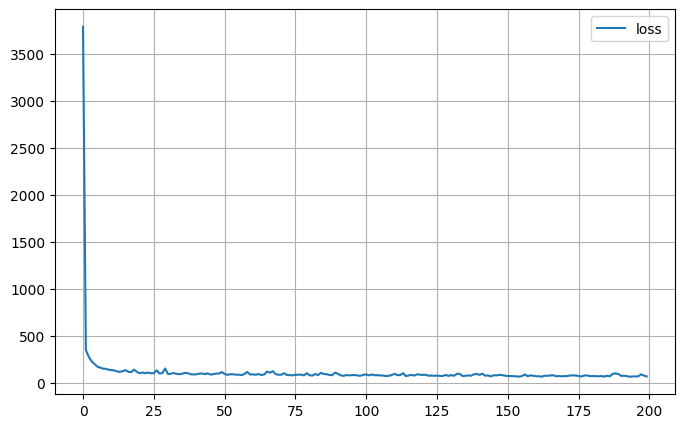

In [75]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [76]:
x_input = data['Close'].iloc[-65:-5].to_numpy()
x_input = x_input.reshape((1, 60))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[286.35336 292.02164 291.35797 288.73425 286.85437]]


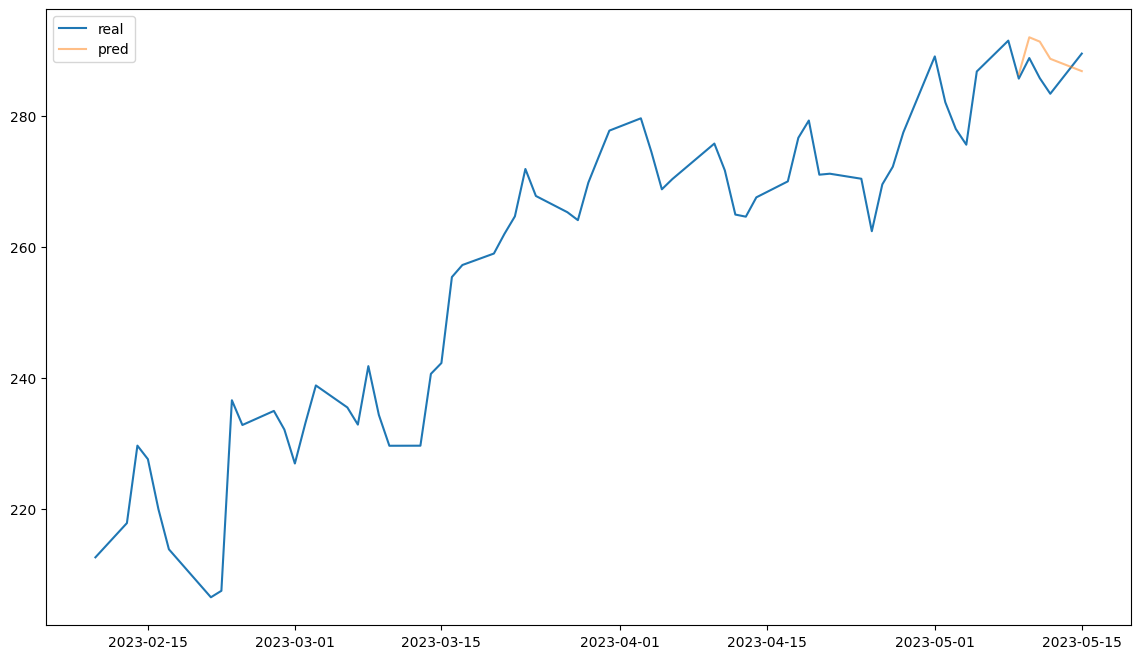

In [77]:
yhat = yhat.squeeze()

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.plot(data['Close'].iloc[-65:], label='real')
#ax[1].plot(data['Close'].iloc[:-65])
#ax.plot(data['Close'].iloc[-65:-5], alpha=0.5)
ax.plot(pd.Series(yhat, index=data['Close'].index[-5:]), alpha=0.5, label='pred')
plt.legend()

## Imágenes

In [52]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [53]:
X_train_full.shape

(60000, 28, 28)

In [54]:
X_train_full.dtype

dtype('uint8')

In [55]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [56]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [57]:
class_names[y_train[0]]

'Coat'

Text(0.5, 1.0, 'Ankle boot')

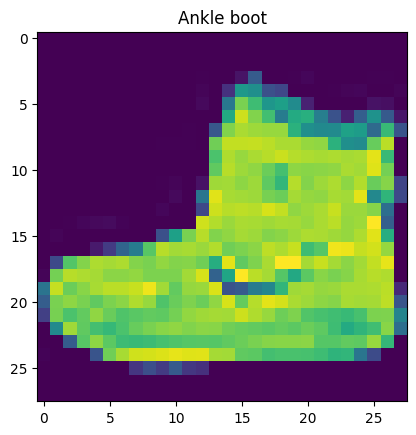

In [60]:
plt.imshow(X_valid[0])
plt.title(class_names[y_valid[0]])

In [61]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [62]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 300)               235500    
                                                                 
 dense_21 (Dense)            (None, 100)               30100     
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


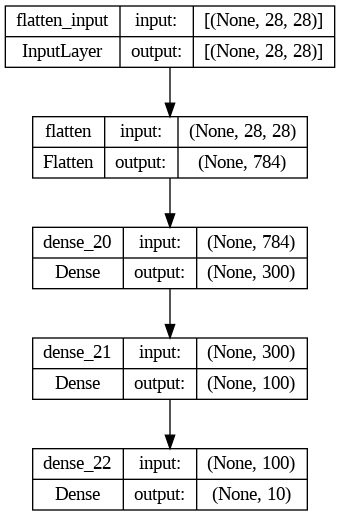

In [63]:
plot_model(model,  show_shapes=True, show_layer_names=True)

In [64]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [65]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7367 - accuracy: 0.7599 - val_loss: 0.5416 - val_accuracy: 0.8156
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4966 - accuracy: 0.8277 - val_loss: 0.4487 - val_accuracy: 0.8510
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4489 - accuracy: 0.8424 - val_loss: 0.4107 - val_accuracy: 0.8588
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4203 - accuracy: 0.8519 - val_loss: 0.4067 - val_accuracy: 0.8594
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3992 - accuracy: 0.8603 - val_loss: 0.3850 - val_accuracy: 0.8630
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3833 - accuracy: 0.8640 - val_loss: 0.3750 - val_accuracy: 0.8700
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3691 - accuracy: 0.8696 - val_loss: 0.3562 - val_accuracy

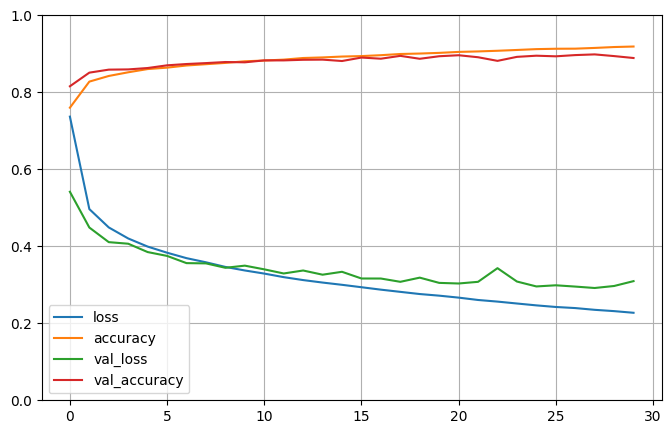

In [66]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [67]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 69.8861 - accuracy: 0.8428


[69.88606262207031, 0.8428000211715698]

In [68]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 58ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Regresión

In [69]:
housing = fetch_california_housing()

In [80]:
pd.DataFrame(housing.data, columns=housing.feature_names).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [83]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
 housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(
 X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [84]:
model = keras.models.Sequential([
 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
 keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")

In [85]:
history = model.fit(X_train, y_train, epochs=20,
 validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.9685 - val_loss: 0.6066
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 1.1097 - val_loss: 0.4918
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4749 - val_loss: 0.4034
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4235 - val_loss: 0.3766
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4059 - val_loss: 0.3670
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3921 - val_loss: 0.3646
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3827 - val_loss: 0.3583
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3766 - val_loss: 0.3515
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3721 - val_loss: 0.3477
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3674 - val_loss: 0.3517

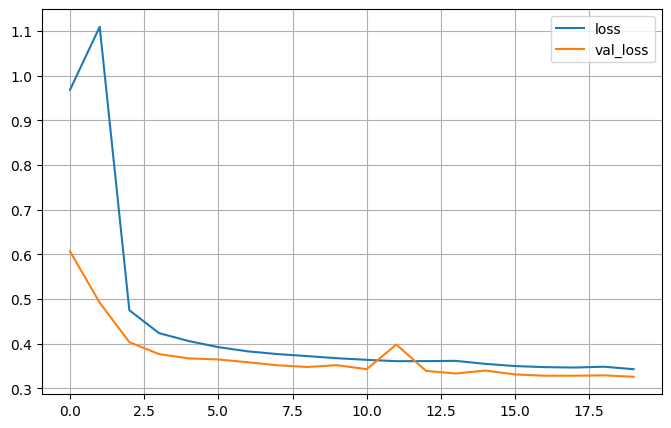

In [87]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [ ]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] 
y_pred = model.predict(X_new)